# Получение ВАХ диода 
## Кирилл Шохин
### Комплектация:
+ Диод с p-n переходом
+ Сопротивление R, 19.7 Ом
+ Осциллограф
+ Два мультиметра
+ Криостат
+ Жидкий азот

### Задание
Необходимо получить зависимость тока от напряжения диода (p-n) для низких температур. Для этого собираем нижеприведенную схему, в качестве питания которой выступает генератор осциллографа, таким образом, чтобы конструкция влезла в криостат.

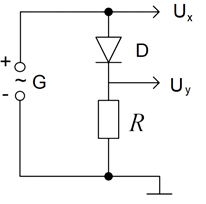

Чтобы знать температуру, в которой находится диод, закрепим на нем терморезистор, сопротивление которого скажет нам температуру после калибровки. Затем погружаем в жидкий азот и проводим измерения в разных положениях, дождавшись некоторой стабилизации показателей. Предврарительно калибруем на разных температурах воды.

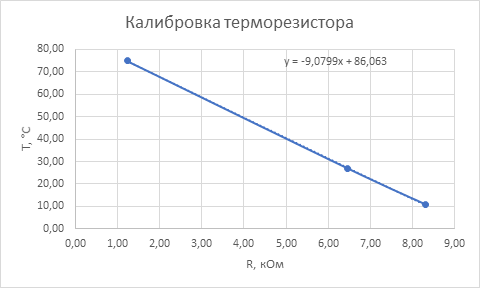

### Обработка данных 

Функция получения температуры:

In [1]:
def T(R):
    return -9.08*R + 86.06

Загружаем данные, полученные на осциллографе:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=[]
for i in range(2, 10):
    data.append(pd.read_csv(r'C:\Users\Кириши\Desktop\Лабы\scope_%d.csv' % i, header=1, dtype='float'))

In [3]:
data[0].head()

,second,Volt,Volt.1
0,-0.000003,-0.151759,-0.298050
1,-0.000002,-0.151759,-0.338251
2,-0.000002,-0.352764,-0.378452
3,-0.000002,-0.352764,-0.298050
4,-0.000002,-0.151759,-0.217648


__Примечание:__ сопротивление терморезистора при погружении в азот стало больше предельного значения мультиметра, поэтому калибровка в узком диапазоне от 10 до 80 градусов дала погрешность на низких температурах.

In [4]:
# Вычисляем предсказательное сопротивление при температуре жидкого азота
T_azot = -196
R_azot = (T_azot - 86.06)/(-9.08)
R_azot

31.06387665198238

In [5]:
# Сопротивления криостата от номера эксперимента
Rs = [6.13, 46.5, 13.09, 10.7, 9.6, 2, 1.3, R_azot]

Теперь строим графики всех экспериментов 

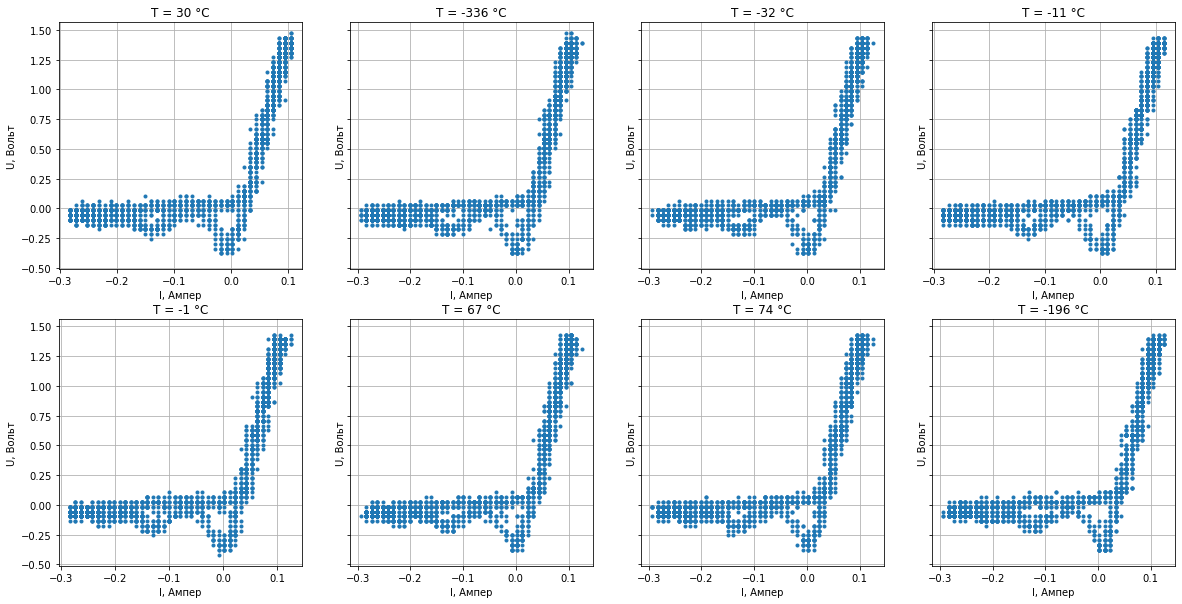

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
for i in range(len(data)):
    axes[i // 4][i % 4].plot(data[i]['Volt']/19.7, data[i]['Volt.1'], 'o', markersize=3)
    axes[i // 4][i % 4].grid()
    axes[i // 4][i % 4].set_title('T = %d °С' % T(Rs[i]))
    axes[i // 4][i % 4].set_xlabel('I, Aмпер')
    axes[i // 4][i % 4].set_ylabel('U, Вольт')

Интерес представляют только крайние два графика, во-первых, на них мы точно знаем температуру, во-вторых, между ними лучше видно различие.

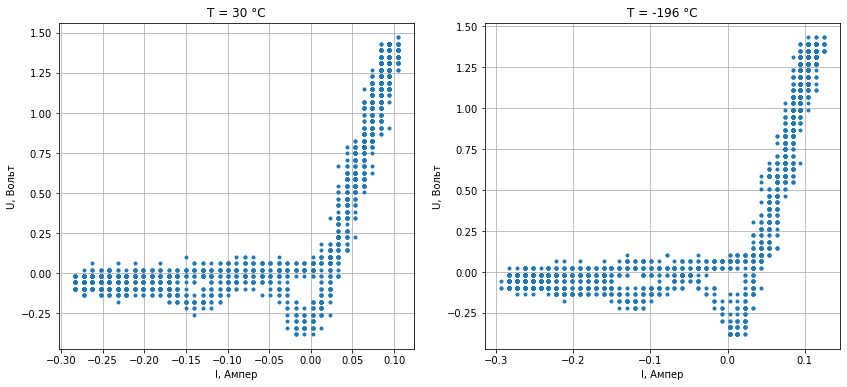

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
for i in range(0,len(data), 7):
    axes[i % 2].plot(data[i]['Volt']/19.7, data[i]['Volt.1'], 'o', markersize=3)
    axes[i % 2].grid()
    axes[i % 2].set_title('T = %d °С' % T(Rs[i]))
    axes[i % 2].set_xlabel('I, Aмпер')
    axes[i % 2].set_ylabel('U, Вольт')

Теперь видно, что при низкой температуре диод открывается медленнее.

# Температурная зависимость медной проволоки
### Комплектация
+ Медная проволока
+ Два мультиметра
+ Криостат
+ Жидкий азот
+ Источник тока

### Задание
Получить зависимость сопротивления медной проволоки от температуры.



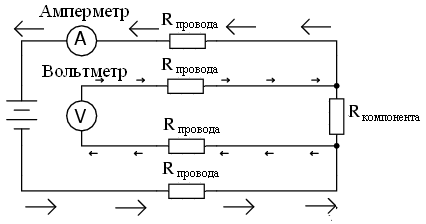

Соберем вышеприведенную схему для более точного измерения сопотивления. Подадим постоянный ток $I=1.04 А$ и будем измерять напряжение на проволоке при разных температурах.

In [8]:
I = 1.04

# Функция температуры от сопротивления терморезистора
def T(R):
    return (R-0.9)/0.0035 + 273.15

In [9]:
data = pd.read_csv(r'C:\Users\Кириши\Desktop\Лабы\Проволока.csv', names=['R (Ом), терморезистор', 'U (В), проволоки'], sep=';')
data

,"R (Ом), терморезистор","U (В), проволоки"
0,0.97331,0.230070
1,0.96007,0.227350
2,0.95102,0.224790
3,0.93409,0.220140
4,0.91777,0.215110
...,...,...
61,0.69484,0.167130
62,0.27481,0.046955
63,0.29103,0.051371
64,0.31010,0.056694


Переведем данные в нужные нам значения:

In [10]:
data['Температура (К)'] = T(data['R (Ом), терморезистор'])
data['R (Ом), проволоки'] = data['U (В), проволоки']/I
data

,"R (Ом), терморезистор","U (В), проволоки",Температура (К),"R (Ом), проволоки"
0,0.97331,0.230070,294.095714,0.221221
1,0.96007,0.227350,290.312857,0.218606
2,0.95102,0.224790,287.727143,0.216144
3,0.93409,0.220140,282.890000,0.211673
4,0.91777,0.215110,278.227143,0.206837
...,...,...,...,...
61,0.69484,0.167130,214.532857,0.160702
62,0.27481,0.046955,94.524286,0.045149
63,0.29103,0.051371,99.158571,0.049395
64,0.31010,0.056694,104.607143,0.054513


Теоретическая зависимость сопротивления меди от температуры (в нормальном диапазоне температур):

$$R = R_0(1+\alpha T)$$

Теперь строим график нужной нам зависимости сопротивления от температуры:

(0.0008729810525388862, -0.03691780337109793)

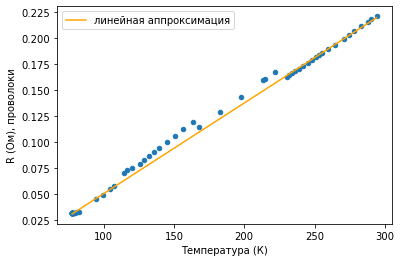

In [13]:
data.plot.scatter(x = 'Температура (К)', y = 'R (Ом), проволоки')
k, b = np.polyfit(data.loc[(data['Температура (К)']>223)|(data['Температура (К)']<113),'Температура (К)'],
                    data.loc[(data['Температура (К)']>223)|(data['Температура (К)']<113), 'R (Ом), проволоки'], 1)
x = np.linspace(data['Температура (К)'].min(), data['Температура (К)'].max(), 21)
y = k*x+b
plt.plot(x, y, c='orange', label='линейная аппроксимация')
plt.legend()
k, b

$$R = 0.000873*T - 0.037$$

Итак мы можем наблюдать вполне линейный рост сопротивления медной проволоки от температуры.